In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import kagglehub
import os

In [2]:
# Download dataset

dataset_path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print(f"Downloaded files:\n{os.listdir(dataset_path)}")

Downloaded files:
['car data.csv']


In [3]:
# List the files

print(f"Files in dataset folder:\n{os.listdir(dataset_path)}")

Files in dataset folder:
['car data.csv']


In [4]:
# Find CSV file in the downloaded path

csv_file = next((f for f in os.listdir(dataset_path) if f.endswith('.csv')), None)
file_path = os.path.join(dataset_path, csv_file)
print(f"Using file: {file_path}")

Using file: /kaggle/input/car-price-predictionused-cars/car data.csv


In [5]:
# Load the dataset

df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print(df.info())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5 

In [6]:
# Check for null values and Describe the datas

print(df.isnull().sum())
print(df.describe())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


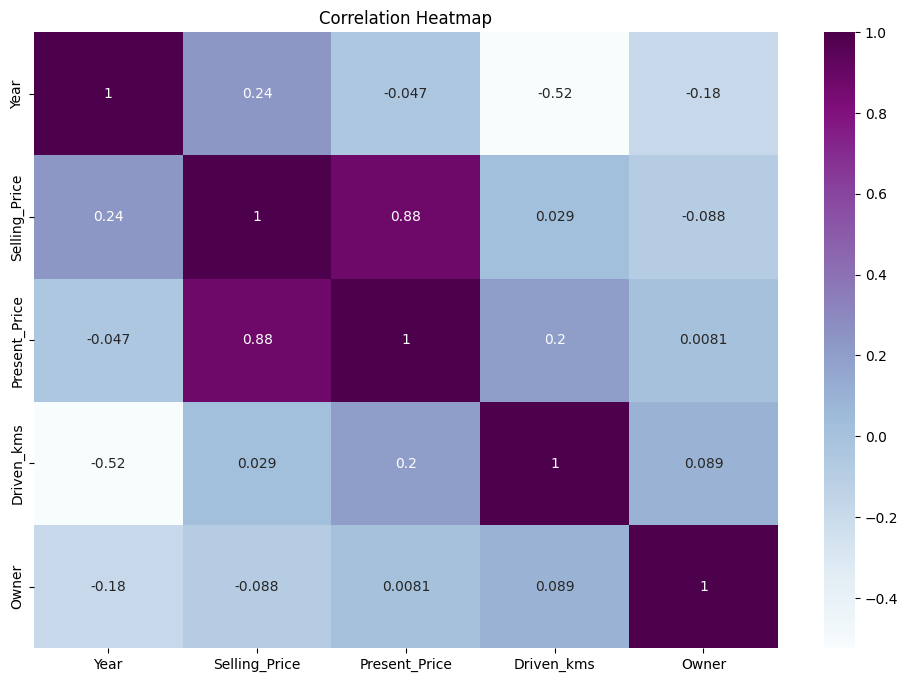

In [7]:
# Plot correlation Heatmap

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="BuPu")
    plt.title("Correlation Heatmap")
    plt.show()

In [8]:
# Drop ID and fill missing values

df = df.loc[:, ~df.columns.str.contains('id', case=False)]
df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
# Categorical features

df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded Columns:", df_encoded.columns)

Encoded Columns: Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)


In [10]:
# Define target column

target_candidates = [col for col in df_encoded.columns if 'price' in col.lower()]
if not target_candidates:
    raise ValueError("No column with 'price' found. Check your dataset columns.")
target_col = target_candidates[0]

In [11]:
# Split features and target
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions and metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
# Output metrics

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 9.22
Root Mean Squared Error (RMSE): 3.04
R^2 Score: 0.60


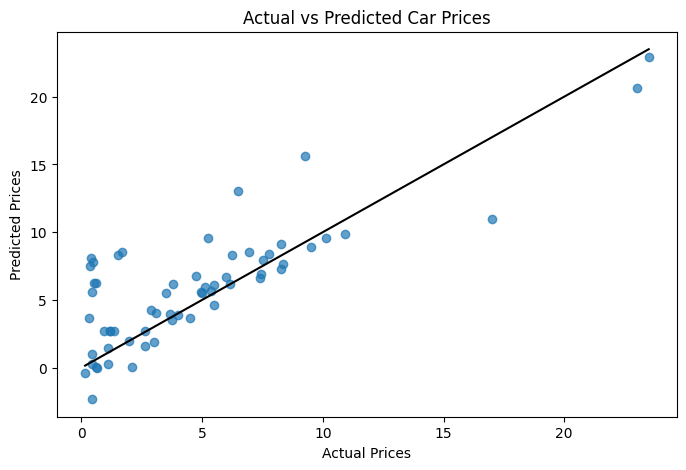

In [14]:
# Plot actual vs predicted prices

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.show()

In [16]:
# Real-world Apllication

user_input = {
    "Car Name": "ritz",
    "Year": 2014,
    "Present Price": 3.35,
    "Selling Price": 5.59,
    "KMs Driven": 27000,
    "Fuel Type": "Petrol",
    "Seller Type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}

# Prepare input for model

input_data = {
    'Year': user_input['Year'],
    'KM_Driven': user_input['KMs Driven'],
    'Present_Price': user_input['Present Price'],
    'Mileage': 18.5, 'Engine': 1197, 'Max_Power': 82.0,
    'Fuel_Petrol': int(user_input['Fuel Type'] == 'Petrol'),
    'Fuel_Diesel': int(user_input['Fuel Type'] == 'Diesel'),
    'Seller_Type_Individual': int(user_input['Seller Type'] == 'Individual'),
    'Transmission_Manual': int(user_input['Transmission'] == 'Manual'),
    'Owner_Second Owner': int(user_input['Owner'] == 'Second Owner')
}

sample_df = pd.DataFrame([{col: input_data.get(col, 0) for col in X.columns}])
predicted_price = model.predict(sample_df)[0]

# Display the result

print("     Real-World Car Price Prediction     ")
print(f"Name of the Car         : {user_input['Car Name']}")
print(f"Year of the Car         : {user_input['Year']}")
print(f"Present Price (Lakhs)   : {user_input['Present Price']}")
print(f"KMs Driven              : {user_input['KMs Driven']}")
print(f"Fuel Type               : {user_input['Fuel Type']}")
print(f"Seller Type             : {user_input['Seller Type']}")
print(f"Transmission            : {user_input['Transmission']}")
print(f"Owner Count             : {user_input['Owner']}")
print(f"Actual Selling Price    : ₹{user_input['Selling Price']:.2f} Lakhs")
print(f"Predicted Selling Price : ₹{predicted_price:.2f} Lakhs")

     Real-World Car Price Prediction     
Name of the Car         : ritz
Year of the Car         : 2014
Present Price (Lakhs)   : 3.35
KMs Driven              : 27000
Fuel Type               : Petrol
Seller Type             : Dealer
Transmission            : Manual
Owner Count             : 0
Actual Selling Price    : ₹5.59 Lakhs
Predicted Selling Price : ₹6.91 Lakhs
